# IMPORT THE LABRAIES

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# DATA MANUPULATION LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML MODEL LIBRARIES
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Read the data set

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Autoscout /AS24_Case_Study_Data.csv', sep = ';')

In [7]:
data.head()

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
0,350625839,Basic,Mitsubishi,16750,5,2013,24.07.18,24.08.18,3091.0,123.0,30,0.03780329990294403
1,354412280,Basic,Mercedes-Benz,35950,4,2015,16.08.18,07.10.18,3283.0,223.0,52,0.06792567773378008
2,349572992,Basic,Mercedes-Benz,11950,3,1998,16.07.18,05.09.18,3247.0,265.0,51,0.0816137973514013
3,350266763,Basic,Ford,1750,6,2003,20.07.18,29.10.18,1856.0,26.0,101,0.014008620689655173
4,355688985,Basic,Mercedes-Benz,26500,3,2014,28.08.18,08.09.18,490.0,20.0,12,0.04081632653061224


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78321 entries, 0 to 78320
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   article_id               78321 non-null  int64  
 1   product_tier             78321 non-null  object 
 2   make_name                78321 non-null  object 
 3   price                    78321 non-null  int64  
 4   first_zip_digit          78321 non-null  int64  
 5   first_registration_year  78321 non-null  int64  
 6   created_date             78321 non-null  object 
 7   deleted_date             78321 non-null  object 
 8   search_views             78311 non-null  float64
 9   detail_views             78311 non-null  float64
 10  stock_days               78321 non-null  int64  
 11  ctr                      78297 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 7.2+ MB


In [9]:
data.describe()

,article_id,price,first_zip_digit,first_registration_year,search_views,detail_views,stock_days
count,7.832100e+04,78321.000000,78321.000000,78321.000000,78311.000000,78311.000000,78321.000000
mean,3.574869e+08,15067.655316,4.632117,2011.089465,2297.502522,93.469870,35.986262
std,5.076572e+06,16374.497606,2.354275,6.538395,6339.034423,228.025588,32.214835
min,3.472324e+08,1.000000,1.000000,1924.000000,0.000000,0.000000,-3.000000
25%,3.536387e+08,5750.000000,3.000000,2008.000000,367.000000,13.000000,10.000000
50%,3.585480e+08,10900.000000,5.000000,2013.000000,920.000000,36.000000,25.000000
75%,3.614817e+08,18890.000000,7.000000,2015.000000,2234.000000,94.000000,55.000000
max,3.647040e+08,249888.000000,9.000000,2106.000000,608754.000000,13926.000000,127.000000


In [10]:
# Function to remove missing values, carry out some conversion & clean out the DataFrame from unecessary columns:
def data_corr(df):
    data.created_date=pd.to_datetime(data.created_date)
    data.deleted_date=pd.to_datetime(data.deleted_date)
    data['created_month']=pd.DatetimeIndex(data.created_date).month
    data['created_year']=pd.DatetimeIndex(data.created_date).year
    data['deleted_month']=pd.DatetimeIndex(data.deleted_date).month
    data['deleted_year']=pd.DatetimeIndex(data.deleted_date).year
    data.drop(columns = ['created_date', 'deleted_date','first_zip_digit'], inplace=True)
    df.drop(df[df.stock_days<0].index, inplace=True)
    df.drop('article_id', axis=1, inplace=True)
    df.dropna(inplace=True)
    pd.get_dummies(data, columns=['product_tier'])

In [11]:
data_corr(data)

In [12]:
data.head()

,product_tier,make_name,price,first_registration_year,search_views,detail_views,stock_days,ctr,created_month,created_year,deleted_month,deleted_year
0,Basic,Mitsubishi,16750,2013,3091.0,123.0,30,0.03780329990294403,7,2018,8,2018
1,Basic,Mercedes-Benz,35950,2015,3283.0,223.0,52,0.06792567773378008,8,2018,7,2018
2,Basic,Mercedes-Benz,11950,1998,3247.0,265.0,51,0.0816137973514013,7,2018,5,2018
3,Basic,Ford,1750,2003,1856.0,26.0,101,0.014008620689655173,7,2018,10,2018
4,Basic,Mercedes-Benz,26500,2014,490.0,20.0,12,0.04081632653061224,8,2018,8,2018


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78206 entries, 0 to 78320
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_tier             78206 non-null  object 
 1   make_name                78206 non-null  object 
 2   price                    78206 non-null  int64  
 3   first_registration_year  78206 non-null  int64  
 4   search_views             78206 non-null  float64
 5   detail_views             78206 non-null  float64
 6   stock_days               78206 non-null  int64  
 7   ctr                      78206 non-null  object 
 8   created_month            78206 non-null  int64  
 9   created_year             78206 non-null  int64  
 10  deleted_month            78206 non-null  int64  
 11  deleted_year             78206 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 7.8+ MB


# Data Analysis and Visualisation

In [14]:
data.product_tier.unique()

array(['Basic', 'Premium', 'Plus'], dtype=object)

In [15]:
data.product_tier.value_counts()

Basic      75306
Premium     2324
Plus         576
Name: product_tier, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


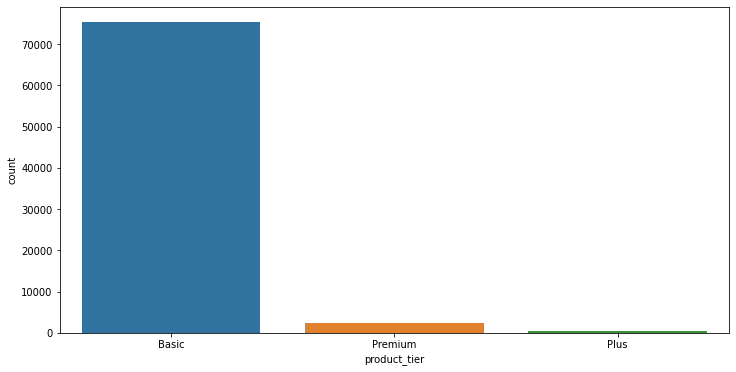

In [16]:
fig = plt.figure(figsize=(12,6))
sns.countplot(data.product_tier)

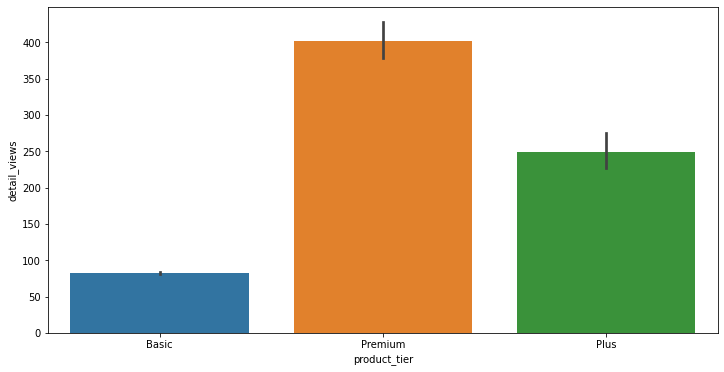

In [17]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x='product_tier', y='detail_views', data=data)

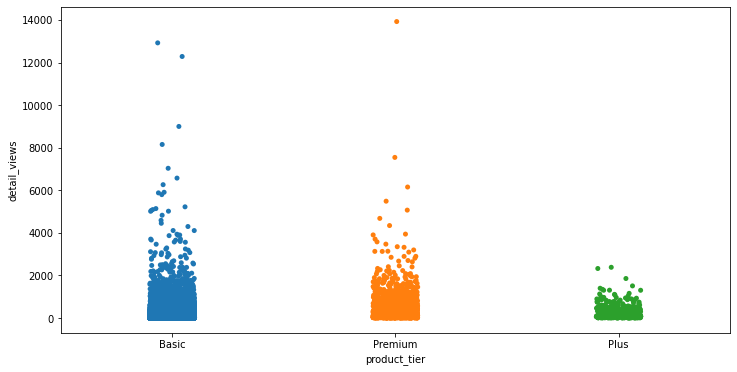

In [18]:
fig = plt.figure(figsize=(12,6))
sns.stripplot(y=data.detail_views, x=data.product_tier)

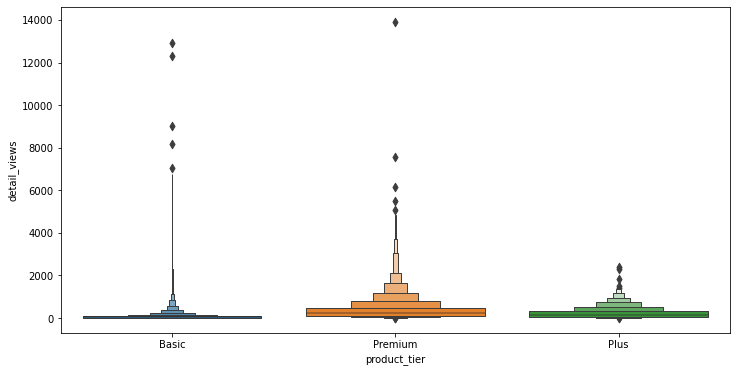

In [19]:
fig = plt.figure(figsize=(12,6))
sns.boxenplot(y=data.detail_views, x=data.product_tier)

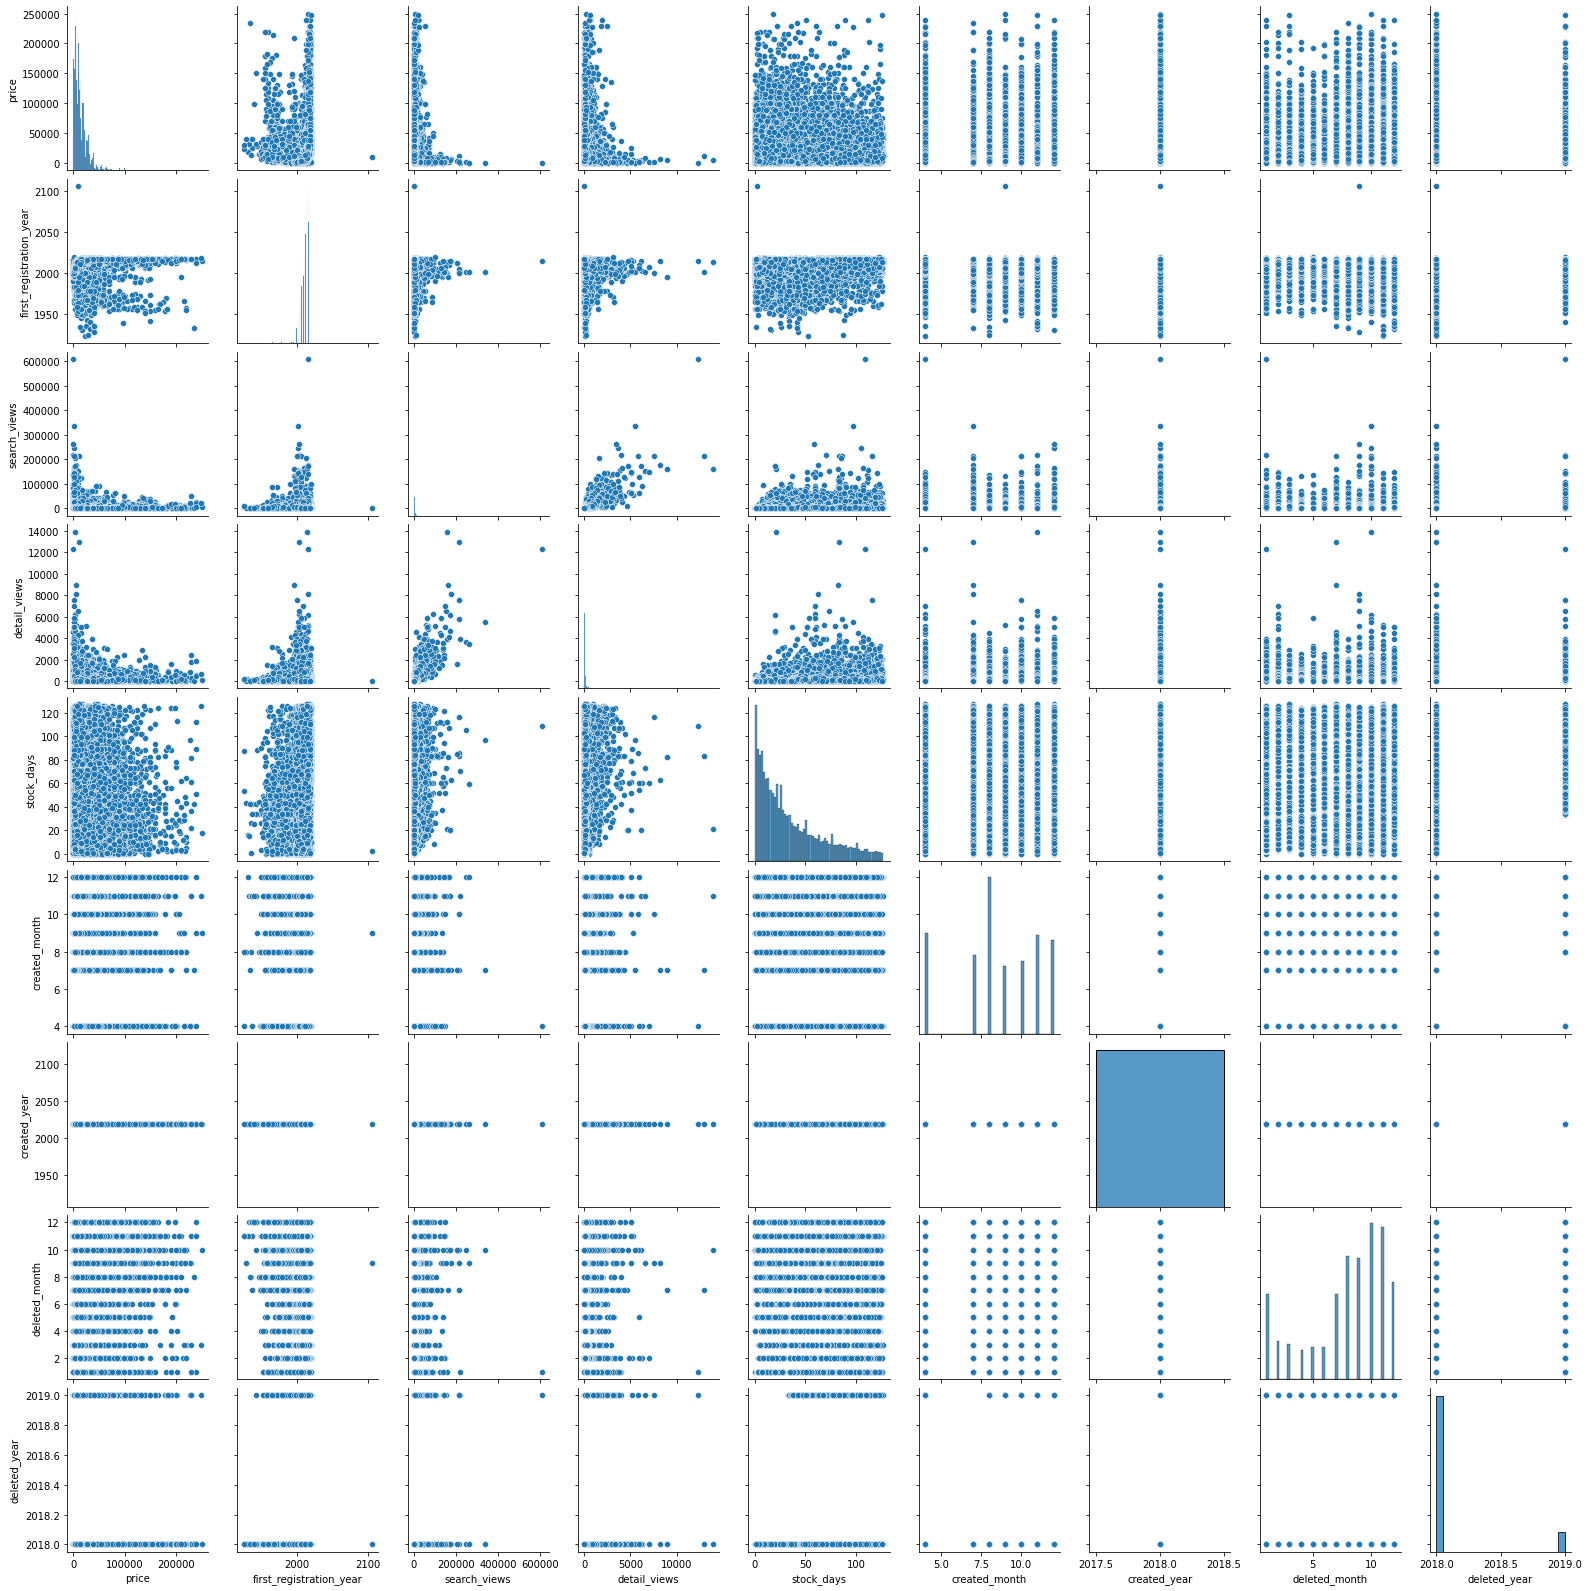

In [20]:
sns.pairplot(data)

In [22]:
data.corr()

,price,first_registration_year,search_views,detail_views,stock_days,created_month,created_year,deleted_month,deleted_year
price,1.000000,0.311401,0.002910,0.028807,0.085633,-0.003042,NaN,0.002640,0.037572
first_registration_year,0.311401,1.000000,-0.110371,-0.122762,0.081457,0.014557,NaN,-0.001560,0.051161
search_views,0.002910,-0.110371,1.000000,0.835607,0.271442,0.013432,NaN,-0.047891,0.166346
detail_views,0.028807,-0.122762,0.835607,1.000000,0.281346,0.017610,NaN,-0.048401,0.174676
stock_days,0.085633,0.081457,0.271442,0.281346,1.000000,-0.002615,NaN,-0.157983,0.539010
created_month,-0.003042,0.014557,0.013432,0.017610,-0.002615,1.000000,NaN,0.012692,0.195212
created_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deleted_month,0.002640,-0.001560,-0.047891,-0.048401,-0.157983,0.012692,NaN,1.000000,-0.422006
deleted_year,0.037572,0.051161,0.166346,0.174676,0.539010,0.195212,NaN,-0.422006,1.000000


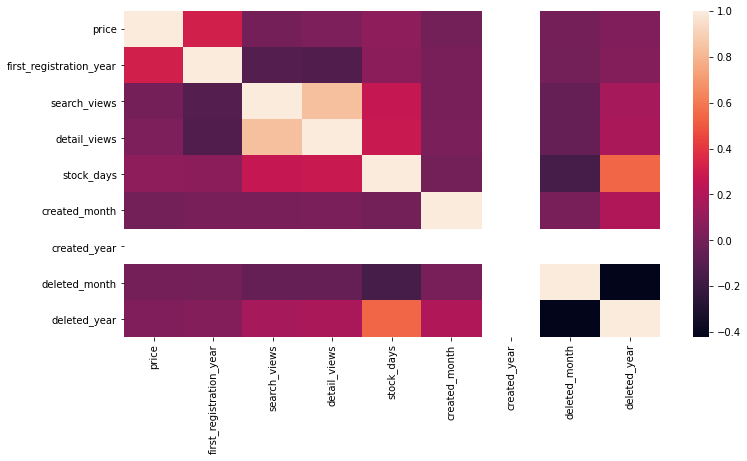

In [23]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(data.corr())

In [24]:
data.created_year.unique(), data.created_month.unique(), data.deleted_year.unique(),data.deleted_month.unique()

(array([2018]),
 array([ 7,  8, 10, 11,  9,  4, 12]),
 array([2018, 2019]),
 array([ 8,  7,  5, 10,  9,  2, 11,  1,  3, 12,  4,  6]))

# Predict detail views

## Compare two different models

In [25]:
data.columns

Index(['product_tier', 'make_name', 'price', 'first_registration_year',
       'search_views', 'detail_views', 'stock_days', 'ctr', 'created_month',
       'created_year', 'deleted_month', 'deleted_year'],
      dtype='object')

In [37]:
X = data.drop(columns=['detail_views', 'product_tier', 'make_name','ctr','created_year','stock_days'], axis=1)
y = data.detail_views

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [39]:
models = ['Linear Regression','Lasso','Random Forest Regression' ]

regressors = [ LinearRegression(), 
              Lasso(alpha=0.1),
              RandomForestRegressor(n_jobs=-1)            
             ]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


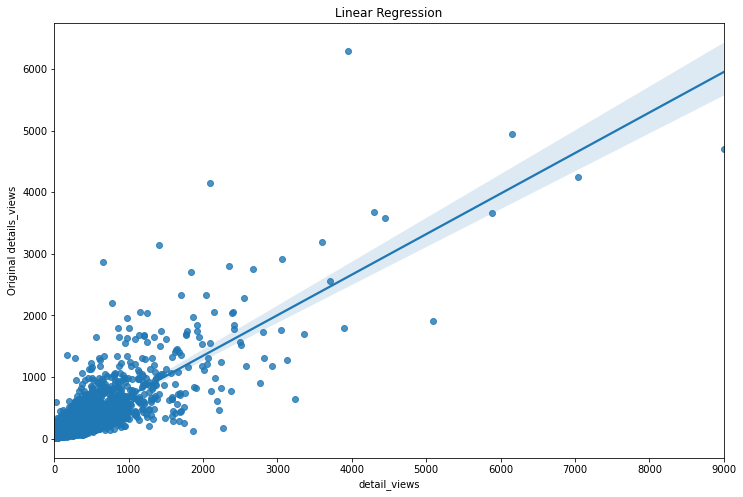

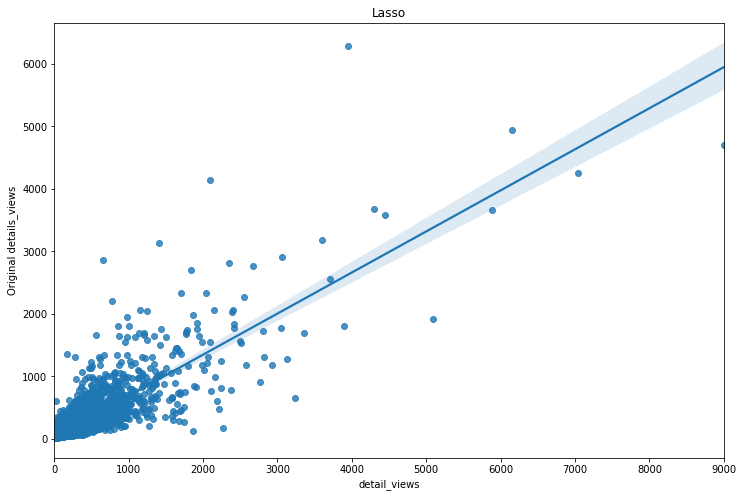

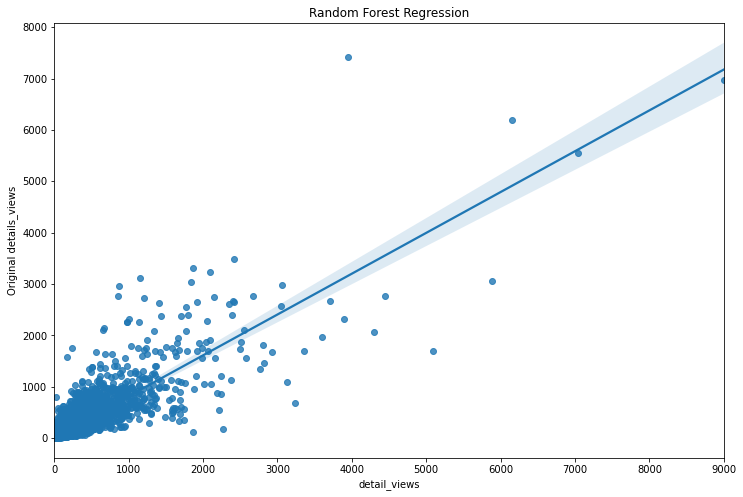

In [40]:
scores = []
mae = []
mse = []
rmse = []
for model, reg in zip(models, regressors):
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    scores.append(metrics.r2_score(y_test, y_pred)*100 )
    mae.append(metrics.mean_absolute_error(y_test, y_pred))
    mse.append(metrics.mean_squared_error(y_test, y_pred))
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    fig = plt.figure(figsize=[12,8])
    plt.title(model)
    plt.xlabel("Predicted details_views")
    plt.ylabel("Original details_views")
    sns.regplot(y_test, y_pred)

In [41]:
results = pd.DataFrame()
results['Model'] = models
results['MAE'] = mae
results['MSE'] = mse
results['RMSE'] = rmse
results['Score'] = scores

results= results.style.background_gradient(cmap = sns.light_palette('blue', as_cmap=True))
results

,Model,MAE,MSE,RMSE,Score
0,Linear Regression,44.759343,12697.250678,112.682078,73.062758
1,Lasso,44.759774,12695.940207,112.676263,73.065538
2,Random Forest Regression,40.411479,12457.857088,111.614771,73.570632


## Search for best hyperparameters for RandomForestRegressor

In [43]:
rfr = RandomForestRegressor(n_jobs=-1)

In [44]:
n_estimators_range = np.arange(10,210,10)
param_grid = dict(n_estimators=n_estimators_range)
grid = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5)

In [46]:
grid.fit(X_test, y_test)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [47]:
grid_pred = grid.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


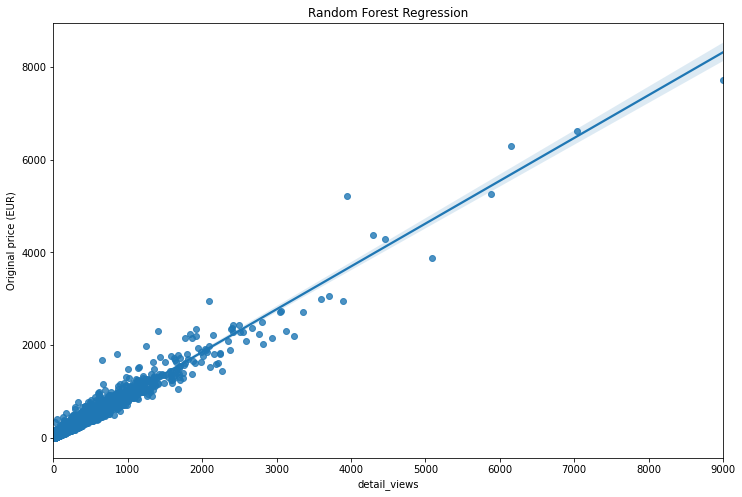

In [48]:
fig = plt.figure(figsize=[12,8])
plt.title("Random Forest Regression")
plt.xlabel("Predicted price (EUR)")
plt.ylabel("Original price (EUR)")
sns.regplot(y_test, grid_pred)

In [52]:
print('Random Forest Regression with best hyperparameters.')
print(metrics.mean_absolute_error(y_test, grid_pred))
print(metrics.mean_squared_error(y_test, grid_pred))
print(metrics.mean_squared_error(y_test, grid_pred))
print(metrics.r2_score(y_test, grid_pred)*100)

Random Forest Regression with best hyperparameters.
15.19565447437464
1827.672709267754
1827.672709267754
96.12258876771718


# CONCLUSION
**The answers to asked questions are shown below:**

***1. Is it possible to predict the product tier from the information given in the other columns?***

NO. Because of big difference in number of different *product_tier*. When the X,y would be selected, there are high probability that only ***Basic*** type of *product_tier* selected. It is only possible after reducing number of ***BASIC*** type to the number of other two types, then model can be built. It is difficult to predict beforehand, whether the results will be good enought to put it into production phase.
    
***2. Is it possible to predict detail views from the information given in the other columns?***
YES. As shown above three different type of models were built. Random Forest Regression perform little better compared to other models. Therefore, I tried to get the best hyperparameters with ***GridSerachCV***. The results impoved tremendously from 74 to 96%. The ***GO*** model will be Random Forest Regression with ***GridSearchCV*** (the last model).